#Question One

In [1]:
import IP

In [2]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
I = imread('HW2-image.jpg')

In [4]:
I2 = IP.rgb2gray(I)
shape(I2)

(512, 512)

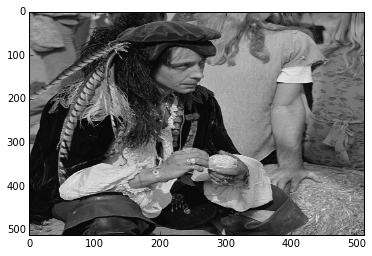

In [5]:
imshow(I2,aspect='auto',cmap='gray');

In [6]:
# In the first picture of figure one, the function pass the points (1,1) and (0,0)
# We can conclude that a = 9 , b = 1
def LogTran1(r):
    return log10(9*r+1)

In [7]:
x=np.arange(0,1,0.01)

In [8]:
y = LogTran1(x)
I3 = LogTran1(I2/(255))

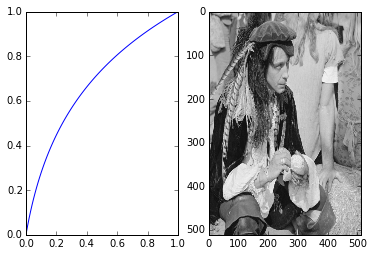

In [9]:
subplot(121);plot(x,y)
subplot(122);imshow(I3,aspect='auto',cmap='gray')

In [10]:
# The curve pass the points (0,1)and (1,0)
# We get a = -9 , b = 10

def LogTran2(r):
    return log10(-9*r+10)

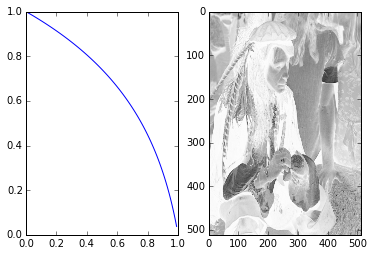

In [11]:
y2 = LogTran2(x)
subplot(121);plot(x,y2)
I4 = LogTran2(I2/(255))
subplot(122);imshow(I4,aspect='auto',cmap='gray')

In [12]:
# The curve pass the points (0,0.54)and (1,1)
# We get a = 6.53 , b = 3.47

def LogTran3(r):
    return log10(6.53*r+3.47)

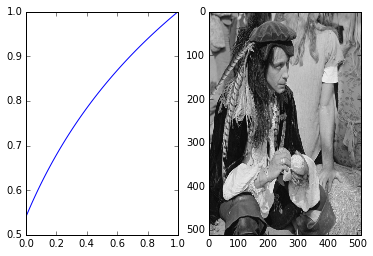

In [13]:
y3 = LogTran3(x)
subplot(121);plot(x,y3)
I5 = LogTran3(I2/(255))
subplot(122);imshow(I5,aspect='auto',cmap='gray')

# Question 2

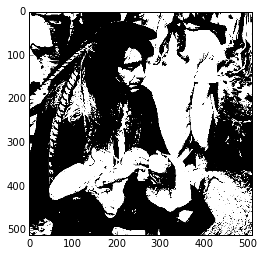

In [14]:
imshow(I2 >127,cmap='gray')

This kind of transformation is called Thresholding.

# Question 3

In [15]:
def get_histogram(In):
    [row,col] = In.shape
    histarray = arange(0,256,1)   # This is an array to distribute our gray value
    histarray[:] = 0              # initialize the array with zero 
    for i in range(0,row):
        for j in range(0,col):
            histarray[In[i,j]] = histarray[In[i,j]]+1 # Treat itensity like the numerical order of the elements in array
                                             #and added up the number of the same itensity
    return histarray

In [16]:
myhist = get_histogram(I2)    # Call the function 

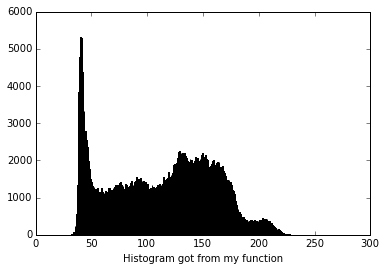

In [17]:
bar(arange(0,256,1),myhist);xlabel('Histogram got from my function')

In [18]:
myhist_norm = myhist/(512*512)  # Normalize the value 

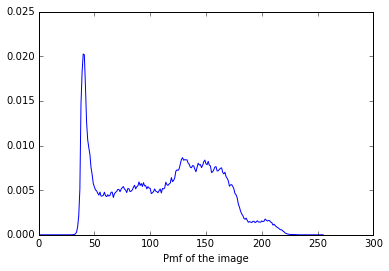

In [19]:
plot(myhist_norm);xlabel('Pmf of the image')       # Here comes the pmf of the image

In [20]:
cdf = IP.cumsum(myhist_norm)  # Use the cunsum function to get cdf from pmf

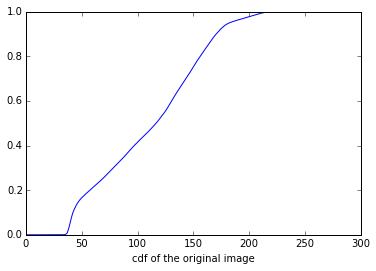

In [21]:
plot(cdf);xlabel('cdf of the original image')

# Compare my histogram with the one obtained by built-in function

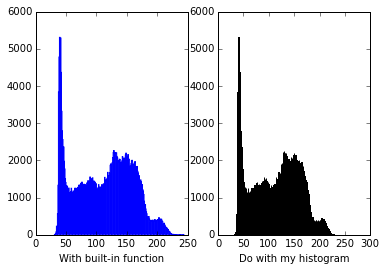

In [22]:
subplot(121);n,bins,patches = hist(I2.ravel(),bins=256,histtype='step',fill=1);xlabel('With built-in function')
subplot(122);bar(arange(0,256,1),myhist);xlabel('Do with my histogram')        

I want to use MSE compare the function I got with the one created by built-in function,the MSE is defined as 
MSE = sum((P1 - P2)^2 * P1), as we learned in the course Random Process, the probability differene smaller than 
0.05 can be neglected. But there is one big problem lies ahead, it seems that the value 'n', which is used by the built-in function to store the number of each itensity, is shifted when compared to 'myhist'. Therefore we need to shift back the value (by 31 numbers)first to match them. 

In [23]:
# As the signal in our own histogram starts calculating at No.31 value, and the one got by the built-in function 
# start at No.0, therefore I have to calculate across them. 

i2 = 0
i3 = 1
difference = zeros((1,226))
for i1 in range(30,255,1):
    difference[0,i2] = myhist[i1] - n[i2]  # The number in 'myhist'will always be 30 numbers ahead in order to calculate the right number
    i2 = i2+1

In [24]:
difference = difference/(512*512)
difference = difference**2;

In [25]:
# As the shape of difference is 1*266, it cannot be used to multiply the pmf of original image, because the shape of 
# the latter one is 1*256 
# So again, in order to calculate the right number, I have to do the shifting

i5 = 0
MSE = zeros((1,226))
for i4 in range(31,256,1):
    MSE[0,i5] = difference[0,i5]*myhist_norm[i4] # The number in original pmf is always 30 ahead in order to offset the shifting 
    i5 = i5+1

MSE2 = sum(MSE)
    

In [26]:
MSE2

1.4983384759525986e-05

In [27]:
# Based on the mse we got, I think it's pretty closed to the one we get from the built-in function.

# Use exposure module to equalize the histogram of the origianl image

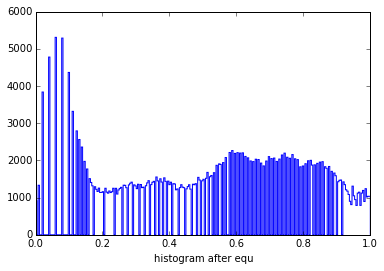

In [28]:
I_expo = IP.histeq(I2) 
n1,bins1,patches1 = hist(I_expo.ravel(),bins=256,histtype='step',fill=0);xlabel('histogram after equ')

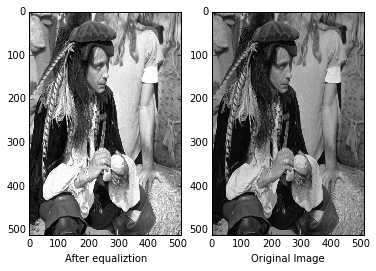

In [29]:
# Compare the equalized image with the original image

subplot(121);imshow(I_expo,aspect='auto',cmap='gray');xlabel('After equaliztion')
subplot(122);imshow(I2,aspect='auto',cmap='gray');xlabel('Original Image')

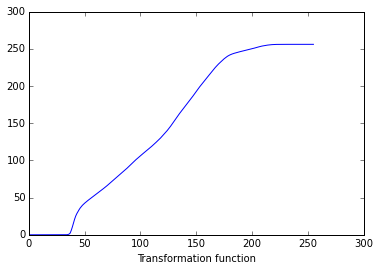

In [30]:
# I decided to multiply the original pdf with 256 to get the transformation function. 
# Our goal of histogram distribution is to get a approximately uniform distribution,where the probability of each value 
#    of itensity is 1/256

# The transformation function I am going to use is S = cdf(r)*256
# I have to prove and explain how this work
# Take derivative in both side of the function S = cdf(r)*256
# we get ds/dr = 256*pmf(R)
# From probability theory we know that: pmf(S)=pmf(R)*(dr/ds)
# So we substitute ds/dr = 256*pmf(R) into pmf(S)=pmf(R)*(dr/ds)
# we get pmf(s)=1/256

# Therefore, we successfully prove that, after this transformation,the image we got is equalized since for each value 
# of the itensity, it got the same probability.

trans_new_image = cdf*256
plot(trans_new_image);xlabel('Transformation function')

# Question 4

In [31]:
checkerboard = zeros([200,200])
subboard = ones([10,10])
for i in range(0,20):
    if i % 2 == 0:
        for j in range(0,20,2):
            checkerboard[(i*10):(i*10+10),(j*10):(10*j+10)]=subboard
    elif i % 2 ==1:
        for j in range(1,20,2):
            checkerboard[(i*10):(i*10+10),(j*10):(10*j+10)]=subboard
            

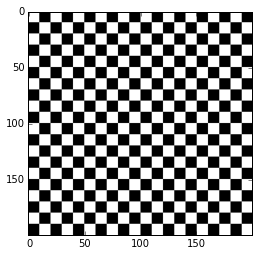

In [32]:
imshow(checkerboard,cmap='gray')

In order to get the smaple, I first create a 200*200 zero array, then insert the value 'one' into the array in both directions at the interval of n. To do sampling, I multiple this array with the checkerboard. And when the product is one(white), I let other pixels around this pixel(whose value is one)to be one,too.

In [33]:
def get_sample(n):
    
    sam_ray = zeros([200,200])
    
    for i in range(0,200,n):
        for j in range(0,200,n):
            sam_ray[i,j] = 1 
            
    sam_ray = sam_ray*checkerboard
    for k in range (0,200,n):
        for h in range(0,200,n):
            if sam_ray[k,h]==1:
                sam_ray[k:(k+n),h:(h+n)]=1
    return sam_ray

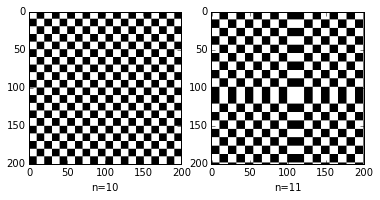

In [34]:
a = get_sample(10)
b = get_sample(11) 

subplot(121);imshow(a,cmap='gray');xlabel('n=10')
subplot(122);imshow(b,cmap='gray');xlabel('n=11')

When the sampling period equals ten, the image recovers well. 
When it increase to 11, some of the squares steps across each other.

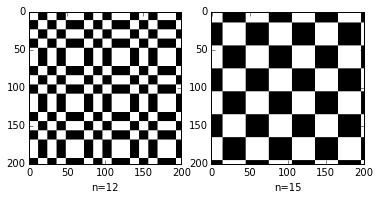

In [35]:
c = get_sample(12)
d = get_sample(15) 

subplot(121);imshow(c,cmap='gray');xlabel('n=12')
subplot(122);imshow(d,cmap='gray');xlabel('n=15')

When n continues to increase, just like the one above, some of the squares step across each other. And the squares' area become larger and larger. It is obvious that the image is undersampled, and the effect that we are observing is called alias. 

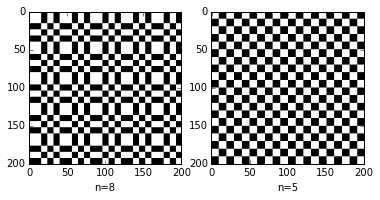

In [36]:
e1 = get_sample(8) 
f1 = get_sample(5) 

subplot(121);imshow(e1,cmap='gray');xlabel('n=8')
subplot(122);imshow(f1,cmap='gray');xlabel('n=5')

When n equals 8,the length of the recovered squares is larger than half of the length of the original square(Five),therefore it might still show some error.When n equals 5, it performs well.

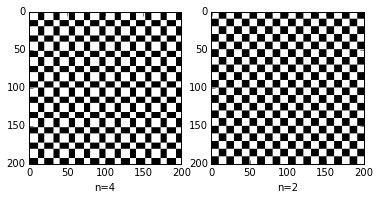

In [37]:
h = get_sample(4) 
g = get_sample(2) 

subplot(121);imshow(h,cmap='gray');xlabel('n=4')
subplot(122);imshow(g,cmap='gray');xlabel('n=2')

When n = 4, there is still some mistake of the recovering process. And 2 works just fine. I can conclude that if I continue to use this function(get_sample) to sample and reconstruct the image, it will work just fine for those n with the length the divisor of 10, like 5,2,1,0.5 and so on. Therefore ,I think the highest sampling period is 10.

Below is a another method I have tried to sample and reconstruct the image. Compared the the first method, it originally extract data from the image to another small array. The size of this array is decided by the sampling period, the smaller the period, the longer the array. And when it perform reconstructing process, I use the 'resize'function to make it to 200*200

In [38]:
# The highest sampling period is 10,and the code below is trying to build the sampling array
def create_sample(n):
    Sam_array = zeros([(200//n),(200//n)]);
    for i in range(0,200):
        for j in range(0,200):
            if i%n == 0 and j%n==0:
                Sam_array[i/n,j/n]=checkerboard[i,j]
    return Sam_array


In [39]:
A = create_sample(10)

In [40]:
B = IP.imresize(A,(200,200),'nearest')  # To recover the checkerboard using the sample array

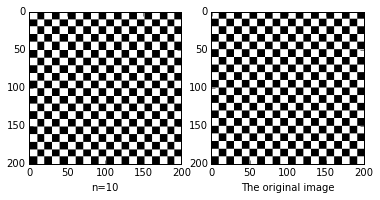

In [41]:
subplot(121);imshow(B,cmap='gray');xlabel('n=10')
subplot(122);imshow(checkerboard,cmap='gray');xlabel('The original image')

But again, the same problem occur when n is not divisor of ten, it works just fine only for those divisor, like 5, 2.